# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [8]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


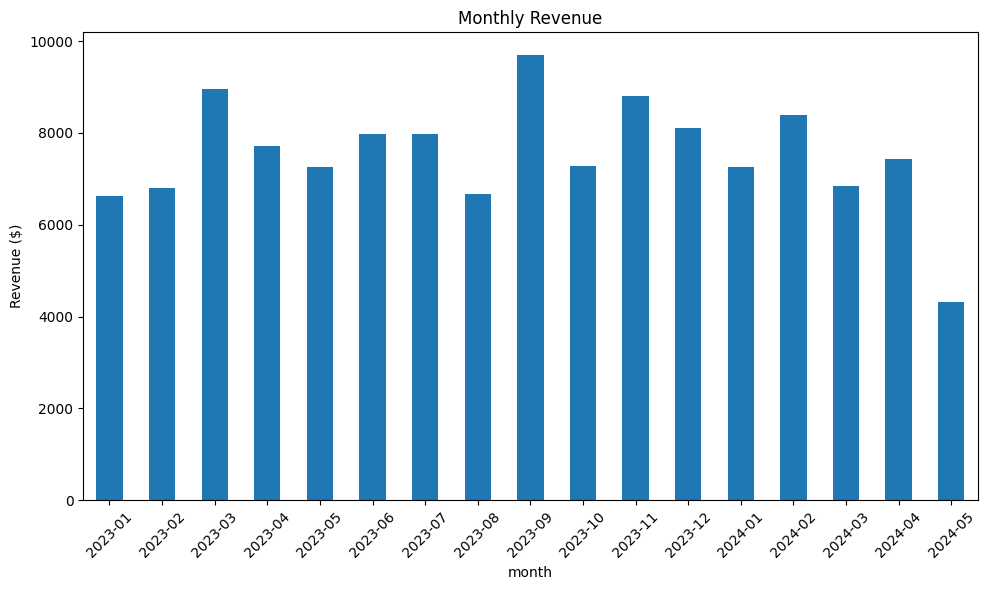

In [9]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [8]:
q4_start = '2023-9-01'
q4_end = '2023-12-31'
q4_mask = (data['order_date'] >= q4_start) & (data['order_date'] <= q4_end)
q4 = data.loc[q4_mask].copy()
total_q4_revenue = q4['revenue'].sum()
print(f'Total revenue (Q4 2023): ${total_q4_revenue:,.2f}')
q4['month'] = q4['order_date'].dt.to_period('M')
monthly_breakdown = q4.groupby('month')['revenue'].sum().sort_index()
monthly_breakdown



Total revenue (Q4 2023): $33,910.62


month
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
Freq: M, Name: revenue, dtype: float64

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [9]:
# Your code here
cust = data.groupby("customer_id")["revenue"].sum()
cust_df = cust.to_frame()
cust_df = cust_df.sort_values(by="revenue", ascending=False).head()
print(cust_df)

             revenue
customer_id         
62           4448.39
24           3369.44
90           2976.78
92           2838.74
97           2835.62


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


/tmp/ipykernel_14350/4259080252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_segment.index, y=avg_by_segment.values, palette='viridis')


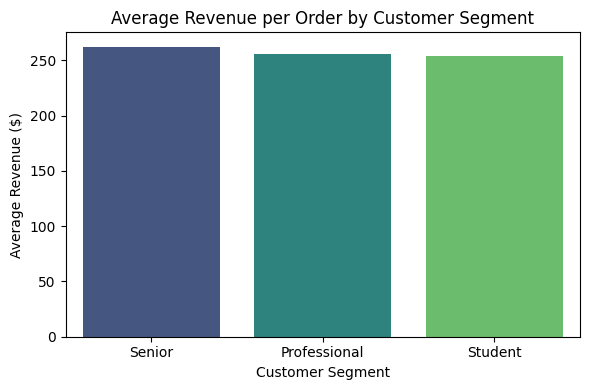

In [12]:
# Your code here
avg_by_segment = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print(avg_by_segment)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_by_segment.index, y=avg_by_segment.values, palette='viridis')
plt.title('Average Revenue per Order by Customer Segment')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()
top_segment = avg_by_segment.idxmax()


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Revenue and average order value by region:


,total_revenue,avg_order_value
region,,
East,31221.80,240.167692
North,34351.69,258.283383
South,34839.45,274.326378
West,27727.73,252.070273


/tmp/ipykernel_14350/1925437846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_by_region.index, y=total_by_region.values, ax=axes[0], palette='Blues_r')
/tmp/ipykernel_14350/1925437846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_by_region.index, y=avg_order_by_region.values, ax=axes[1], palette='Greens_r')


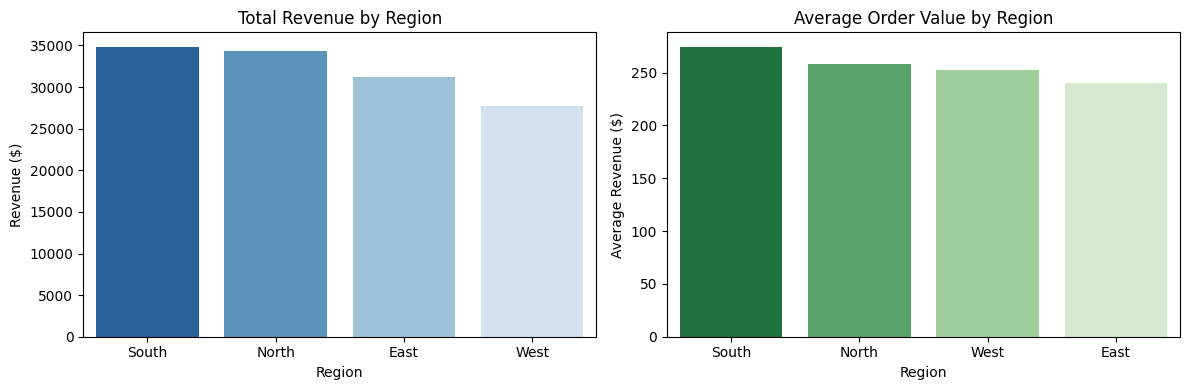

In [ ]:
total_by_region = data.groupby('region')['revenue'].sum().sort_values(ascending=False)
avg_order_by_region = data.groupby('region')['revenue'].mean().sort_values(ascending=False)
region_df = pd.DataFrame({'total_revenue': total_by_region, 'avg_order_value': avg_order_by_region})
print('Revenue and average order value by region:')
display(region_df)
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x=total_by_region.index, y=total_by_region.values, ax=axes[0], palette='Blues_r')
axes[0].set_title('Total Revenue by Region')
axes[0].set_ylabel('Revenue ($)')
sns.barplot(x=avg_order_by_region.index, y=avg_order_by_region.values, ax=axes[1], palette='Greens_r')
axes[1].set_title('Average Order Value by Region')
axes[1].set_ylabel('Average Revenue ($)')
for ax in axes: ax.set_xlabel('Region')
plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product category totals (quantity and revenue):


,total_quantity,total_revenue
product_category,,
Books,227,24046.06
Clothing,253,24804.57
Electronics,239,25498.31
Home,269,29871.47
Sports,246,23920.26


/tmp/ipykernel_14350/3233717055.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qty_by_cat.index, y=qty_by_cat.values, ax=axes[0], palette='rocket')
/tmp/ipykernel_14350/3233717055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rev_by_cat.index, y=rev_by_cat.values, ax=axes[1], palette='crest')


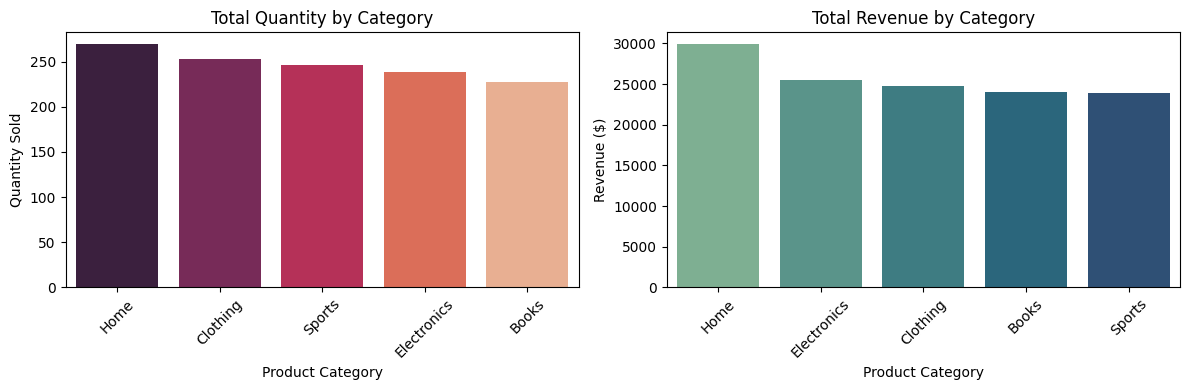

In [16]:
qty_by_cat = data.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
rev_by_cat = data.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
cat_df = pd.DataFrame({'total_quantity': qty_by_cat, 'total_revenue': rev_by_cat})
print('Product category totals (quantity and revenue):')
display(cat_df)
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x=qty_by_cat.index, y=qty_by_cat.values, ax=axes[0], palette='rocket')
axes[0].set_title('Total Quantity by Category')
axes[0].set_ylabel('Quantity Sold')
sns.barplot(x=rev_by_cat.index, y=rev_by_cat.values, ax=axes[1], palette='crest')
axes[1].set_title('Total Revenue by Category')
axes[1].set_ylabel('Revenue ($)')
for ax in axes: ax.set_xlabel('Product Category'); ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Revenue per order for discounted vs non-discounted:


,mean,median,count
is_discounted,,,
No Discount,248.296337,178.98,243
Discounted,263.831362,219.24,257


/tmp/ipykernel_14350/3511011338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_discounted', y='revenue', data=data.replace({True:'Discounted', False:'No Discount'}), palette='pastel')


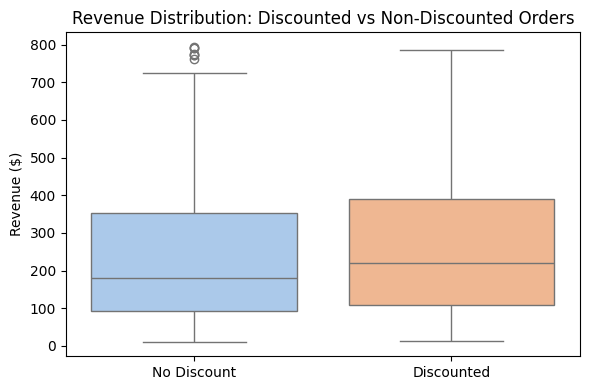

In [18]:
data['is_discounted'] = data['discount_applied'] > 0
mean_by_discount = data.groupby('is_discounted')['revenue'].agg(['mean','median','count']).rename(index={False:'No Discount', True:'Discounted'})
print('Revenue per order for discounted vs non-discounted:')
display(mean_by_discount)
plt.figure(figsize=(6,4))
sns.boxplot(x='is_discounted', y='revenue', data=data.replace({True:'Discounted', False:'No Discount'}), palette='pastel')
plt.title('Revenue Distribution: Discounted vs Non-Discounted Orders')
plt.xlabel('')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Payment method usage and average revenue:


,count,pct_of_orders,avg_revenue
payment_method,,,
Credit Card,137,27.4,257.444234
Gift Card,124,24.8,254.362500
Debit Card,123,24.6,275.980650
PayPal,116,23.2,236.071034


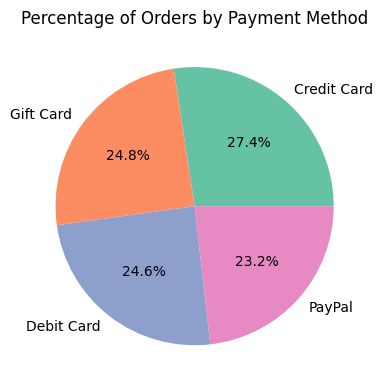

/tmp/ipykernel_14350/2523187207.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_df.index, y=payment_df['avg_revenue'], palette='autumn')


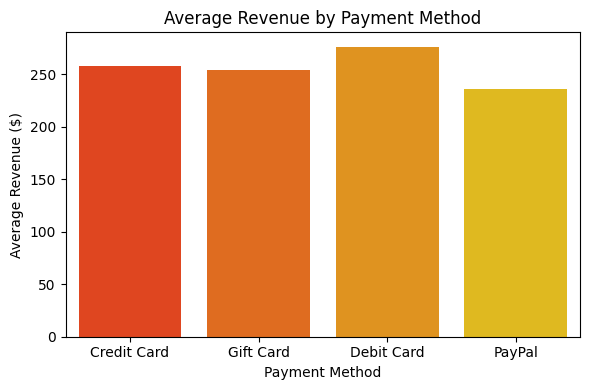

In [23]:
payment_counts = data['payment_method'].value_counts().rename('count')
payment_pct = (payment_counts / payment_counts.sum() * 100).rename('pct_of_orders')
avg_by_payment = data.groupby('payment_method')['revenue'].mean().rename('avg_revenue')
payment_df = pd.concat([payment_counts, payment_pct, avg_by_payment], axis=1).sort_values('count', ascending=False)
print('Payment method usage and average revenue:')
display(payment_df)
plt.figure(figsize=(6,4))
plt.pie(payment_df['count'], labels=payment_df.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage of Orders by Payment Method')
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
sns.barplot(x=payment_df.index, y=payment_df['avg_revenue'], palette='autumn')
plt.title('Average Revenue by Payment Method')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Total revenue by day of week:
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64


/tmp/ipykernel_14350/4057364259.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_day = data.groupby(pd.Categorical(data['day_of_week'], categories=order_days, ordered=True))['revenue'].sum()
/tmp/ipykernel_14350/4057364259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='viridis')


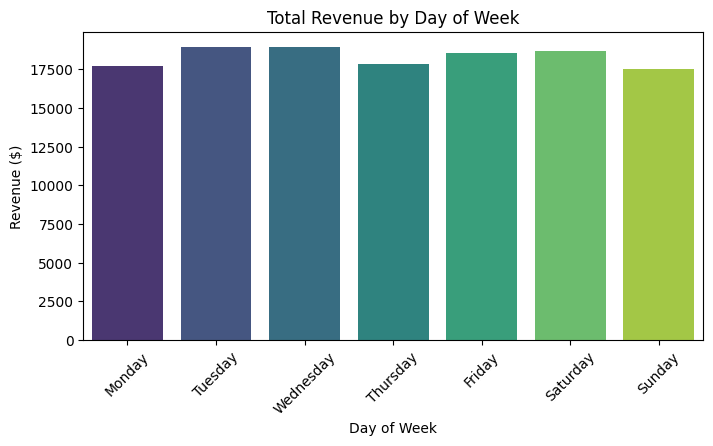

In [ ]:
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
revenue_by_day = data.groupby(pd.Categorical(data['day_of_week'], categories=order_days, ordered=True))['revenue'].sum()
print('Total revenue by day of week:')
print(revenue_by_day)
plt.figure(figsize=(8,4))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='viridis')
plt.title('Total Revenue by Day of Week')
plt.ylabel('Revenue ($)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()
data['is_weekend'] = data['day_of_week'].isin(['Saturday','Sunday'])
avg_by_weekend = data.groupby('is_weekend')['revenue'].mean().rename(index={False:'Weekday', True:'Weekend'})

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


/tmp/ipykernel_14350/1564287147.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette='mako')


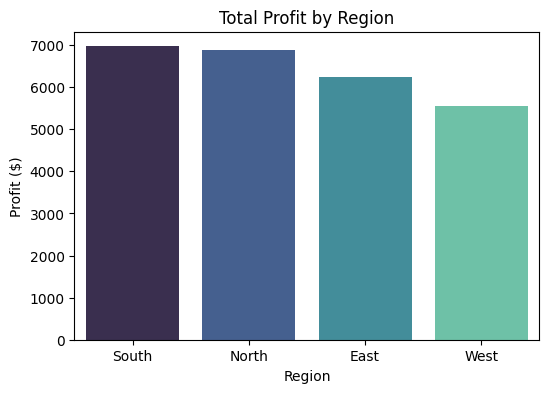

In [31]:
# Q9: Profitability - assume profit margin = 20% of revenue
data['profit'] = data['revenue'] * 0.20
total_profit = data['profit'].sum()
profit_by_region = data.groupby('region')['profit'].sum().sort_values(ascending=False)
print(profit_by_region)
plt.figure(figsize=(6,4))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette='mako')
plt.title('Total Profit by Region')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Recommendation**

1. Consider more discounts
2. Advertise more Home products

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.